In [297]:
from bs4 import BeautifulSoup
import requests

In [298]:
url = requests.get('https://www.grouvee.com/games/?publisher=tencent-games')

In [299]:
soup = BeautifulSoup(url.content,'html.parser')

In [300]:
games = soup.find('div',class_='span8').find_all('div',class_='details-section')

In [301]:
len(games)

26

In [302]:
import requests
import pandas as pd
import re

In [319]:
TENCENT = []
for game in games:
    title = game.find('h4', class_='media-heading').find('a', class_='game-title').text.strip()
    year = re.findall(r'\d+',game.find('h4', class_='media-heading').text.strip())[0]
    rating = game.find('span', class_='date').text.strip()
    rate = re.findall(r'\d+\.\d+', game.find('span', class_='date').text.strip())   
    
    if rate:
        rate = rate[0]
    else:
        rate = None

    if int(year) == 0:
        year = None 
    else:
        year = year
 
    TENCENT.append([title,year,rating,rate])

In [320]:
df = pd.DataFrame(TENCENT,columns=['Game_Title','Year_released','Avg_Grouvee_User_Rating','Rate'])

In [321]:
df

,Game_Title,Year_released,Avg_Grouvee_User_Rating,Rate
0,League of Legends,2009,(3.30 average Grouvee user rating),3.30
1,PUBG: Battlegrounds,2017,(3.02 average Grouvee user rating),3.02
2,PUBG Mobile,2018,(3.06 average Grouvee user rating),3.06
3,Ring Of Elysium,2018,(2.46 average Grouvee user rating),2.46
4,ArcheAge,2013,(2.40 average Grouvee user rating),2.40
5,Crossfire,2007,(2.72 average Grouvee user rating),2.72
6,Arena of Valor,2017,(2.94 average Grouvee user rating),2.94
7,Alliance of Valiant Arms,2009,(2.38 average Grouvee user rating),2.38
8,Alchemy Stars,2021,(3.44 average Grouvee user rating),3.44
9,Contra Returns,2017,(2.50 average Grouvee user rating),2.50


In [392]:
# df.to_csv('Tencent_games.csv')

In [343]:
df1 = df
df1['Year_released'] = df1['Year_released'].astype(float)
df1['Rate'] = df1['Rate'].astype(float)

In [344]:
df1

,Game_Title,Year_released,Avg_Grouvee_User_Rating,Rate
0,League of Legends,2009.0,(3.30 average Grouvee user rating),3.30
1,PUBG: Battlegrounds,2017.0,(3.02 average Grouvee user rating),3.02
2,PUBG Mobile,2018.0,(3.06 average Grouvee user rating),3.06
3,Ring Of Elysium,2018.0,(2.46 average Grouvee user rating),2.46
4,ArcheAge,2013.0,(2.40 average Grouvee user rating),2.40
5,Crossfire,2007.0,(2.72 average Grouvee user rating),2.72
6,Arena of Valor,2017.0,(2.94 average Grouvee user rating),2.94
7,Alliance of Valiant Arms,2009.0,(2.38 average Grouvee user rating),2.38
8,Alchemy Stars,2021.0,(3.44 average Grouvee user rating),3.44
9,Contra Returns,2017.0,(2.50 average Grouvee user rating),2.50


In [385]:
min_year = df1['Year_released'].min()
df1.loc[df1['Year_released'] == min_year]

,Game_Title,Year_released,Avg_Grouvee_User_Rating,Rate
5,Crossfire,2007.0,(2.72 average Grouvee user rating),2.72


In [386]:
max_year = df1['Year_released'].max()
df1.loc[df1['Year_released'] == max_year]

,Game_Title,Year_released,Avg_Grouvee_User_Rating,Rate
23,Synced: Off-Planet,2022.0,(0 average Grouvee user rating),NaN


In [387]:
min_rate = df1['Rate'].min()
df1.loc[df1['Rate'] == min_rate]

,Game_Title,Year_released,Avg_Grouvee_User_Rating,Rate
11,Street Fighter Duel,2020.0,(1.00 average Grouvee user rating),1.0
12,Happy Farm,2008.0,(1.00 average Grouvee user rating),1.0


In [388]:
max_rate = df1['Rate'].max()
df1.loc[df1['Rate'] == max_rate]

,Game_Title,Year_released,Avg_Grouvee_User_Rating,Rate
14,Moonlight Blade,2015.0,(5.00 average Grouvee user rating),5.0
15,Honor of Kings,2015.0,(5.00 average Grouvee user rating),5.0


In [391]:
avg_rate = df1['Rate'].mean()
avg_rate

2.8658823529411763

In [480]:
import matplotlib.pyplot as plt

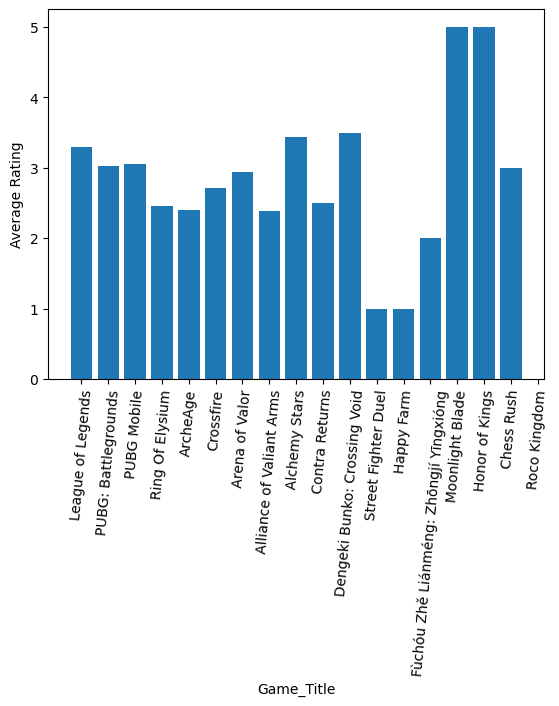

In [486]:
plt.xlabel('Game_Title')
plt.ylabel('Average Rating')
plt.bar(df1['Game_Title'],df1['Rate'])
plt.xticks(rotation=85)
plt.show()

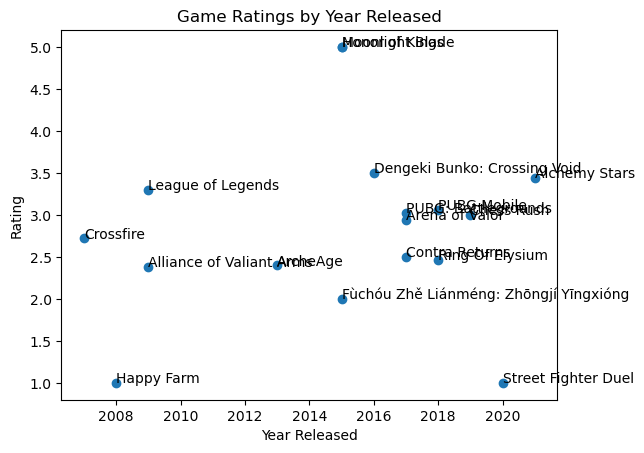

In [497]:
# create a scatter plot with labels
plt.scatter(df1['Year_released'], df1['Rate'])
for i, title in enumerate(df1['Game_Title']):
    plt.annotate(title, (df1['Year_released'][i], df1['Rate'][i]))

# set the x-axis label
plt.xlabel('Year Released')

# set the y-axis label
plt.ylabel('Rating')

# set the title of the plot
plt.title('Game Ratings by Year Released')

# display the plot
plt.show()